In [49]:
%matplotlib inline

from joblib import dump, load
import itertools
import json
import math
import os
import random
import time
from typing import Callable, Dict, List

from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.pyll.base import scope
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# scikit-learn
import sklearn
from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix, \
    f1_score, fbeta_score, log_loss, make_scorer, mean_squared_error, precision_recall_fscore_support, \
    precision_score, precision_recall_curve, recall_score
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC

# statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Models
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor

# NLP
import gc
import re
import string
import operator
from collections import defaultdict




# Configure options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

random_state = 11

random.seed(random_state)
np.random.seed(random_state)

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

random_state = 42
X, y = make_regression(random_state=random_state, n_features=1, noise=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))

0.902797546636954

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import math

random_state = 42
X, y = make_regression(random_state=random_state, n_features=1, noise=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state)
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_train_transformed = scaler.transform(X_train)
model = LinearRegression()
model.fit(X_train_transformed, y_train)

mean_squared_error(y_test, model.predict(X_test))

62.80867119249539

In [56]:
import pandas as pd
pd.DataFrame(X_train).plot(kind='sc')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.475795,1.427305,0.756488,-0.419435,-0.057395,-1.684668,-0.681380,-0.247752,0.967826,-0.522132,...,-0.803948,-1.120047,0.531026,1.320414,-0.262747,0.146935,-1.911317,2.549010,-1.688505,0.227496
1,0.833158,-0.787174,0.681743,0.203359,0.058449,-0.924063,-0.652950,-0.001714,-0.549789,0.702660,...,2.196646,1.127350,-0.749416,1.089537,-0.059654,0.385750,-0.760364,-0.344477,0.997059,-1.755438
2,-0.360039,-1.349576,0.034027,-0.415214,-0.719109,-1.257868,1.191707,0.734638,-0.083718,0.338687,...,0.395820,0.332608,0.444774,-0.985804,0.782130,-0.142147,0.421546,0.550798,-0.571746,1.275391
3,-0.138456,-0.322680,1.328194,-0.250833,0.536653,0.588578,-0.887492,0.927840,-0.437458,0.444603,...,2.165002,1.208366,0.240753,0.057013,0.996048,-1.195883,-0.167122,1.702215,2.061504,-1.525656
4,0.273011,-1.073689,-0.480648,0.081083,0.501685,0.973622,-0.124887,0.519359,0.015698,-1.128063,...,-1.404240,-0.336895,0.518102,1.673364,0.400236,-0.766121,-1.582223,-0.852225,1.029441,-0.917976
5,-0.824514,-0.450013,-0.535335,1.257149,-0.424236,-0.258854,0.543479,1.848609,0.199810,0.270057,...,0.757922,-1.241761,0.466671,-0.175564,-1.517174,-1.820603,0.876047,0.777407,0.257753,-1.130204
6,1.983634,-1.270362,2.367414,1.154694,0.065025,-0.656624,-0.082593,0.563788,0.769969,-0.834271,...,-0.406974,-1.058800,1.056725,-0.591395,-1.743673,0.182994,-0.628149,-0.737029,-0.824612,0.863437
7,0.655234,-0.641165,-0.902654,-0.265065,-0.479965,0.351662,0.809658,0.769136,0.230712,0.236043,...,-0.850975,0.168651,0.428761,-0.187727,0.831499,1.626431,1.031381,-0.556718,0.925282,-0.589254
8,-1.925567,0.247271,-1.451226,0.886579,-0.476063,0.673473,-0.462737,1.202249,-0.307048,-0.433990,...,0.532892,-0.710015,-0.435139,1.206536,-1.120897,1.787240,1.177001,1.677201,-0.759802,0.020121
9,0.558327,-1.402605,-1.243863,1.749577,-0.429406,-1.413714,0.192049,1.247742,-0.309116,1.236093,...,0.894924,-0.290275,-1.993736,-0.673491,0.048860,-0.735530,-0.803675,0.833529,0.919076,-1.103367


In [57]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.561348,1.606653,0.795729,-0.816065,0.070498,-1.663301,-0.716157,-0.411690,1.087957,-0.784341,...,-0.689938,-1.083864,0.513369,1.039950,-0.191986,0.173691,-2.021720,2.320646,-1.784307,0.178601
1,0.904729,-0.678694,0.713831,-0.156930,0.204533,-0.853784,-0.687974,-0.135488,-0.532912,0.750188,...,2.322550,1.004133,-0.886567,0.832915,0.025000,0.422379,-0.858203,-0.643895,0.764179,-2.197843
2,-0.431697,-1.259095,0.004123,-0.811597,-0.695120,-1.209055,1.140684,0.691141,-0.035130,0.294170,...,0.514586,0.265759,0.419067,-1.028102,0.924367,-0.127342,0.336610,0.273364,-0.724550,1.434449
3,-0.183515,-0.199335,1.422152,-0.637625,0.757824,0.756132,-0.920481,0.908030,-0.412938,0.426870,...,2.290781,1.079403,0.196007,-0.092978,1.152918,-1.224642,-0.258484,1.453057,1.774292,-1.922462
4,0.277343,-0.974378,-0.559810,-0.286342,0.717366,1.165937,-0.164490,0.449469,0.071049,-1.543506,...,-1.292609,-0.356258,0.499238,1.356450,0.516349,-0.777113,-1.689034,-1.164111,0.794908,-1.194188
5,-0.951926,-0.330743,-0.619731,0.958348,-0.353945,-0.145798,0.498079,1.941685,0.267688,0.208184,...,0.878123,-1.196944,0.443008,-0.301537,-1.532223,-1.875189,0.796072,0.505539,0.062609,-1.448532
6,2.193306,-1.177345,2.560833,0.849914,0.212140,-0.569147,-0.122563,0.499345,0.876638,-1.175418,...,-0.291390,-1.026961,1.088127,-0.674424,-1.774216,0.211241,-0.724545,-1.046087,-0.964509,0.940744
7,0.705447,-0.528013,-1.022206,-0.652687,-0.418424,0.503980,0.761948,0.729869,0.300692,0.165568,...,-0.737151,0.113432,0.401560,-0.312444,0.977113,1.714351,0.953102,-0.861348,0.696066,-0.800232
8,-2.185147,0.388856,-1.623280,0.566155,-0.413910,0.846485,-0.499410,1.216082,-0.273655,-0.673910,...,0.652201,-0.702914,-0.542961,0.937832,-1.108839,1.881809,1.100311,1.427428,-0.903007,-0.069927
9,0.596908,-1.313821,-1.396071,1.479508,-0.359926,-1.374924,0.149697,1.267152,-0.275864,1.418521,...,1.015669,-0.312944,-2.247008,-0.748042,0.140937,-0.745257,-0.901986,0.563039,0.690177,-1.416369


In [50]:
df = pd.read_csv( '/home/jovyan/work/Downloads/emails.csv')

In [51]:
df

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked
0,8,short_email,generic,9,Thursday,US,3,0
1,33,long_email,personalized,6,Monday,US,0,0
2,46,short_email,generic,14,Tuesday,US,3,0
3,49,long_email,personalized,11,Thursday,US,10,0
4,65,short_email,generic,8,Wednesday,UK,3,0
...,...,...,...,...,...,...,...,...
99945,999969,short_email,generic,21,Thursday,US,0,0
99946,999972,long_email,personalized,6,Tuesday,US,5,0
99947,999976,long_email,personalized,5,Wednesday,UK,0,0
99948,999980,long_email,generic,10,Thursday,FR,4,0


In [52]:
df[df.isna().any(axis=1)]

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked


In [53]:
df[df.duplicated()]

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked


0.020700350175087544


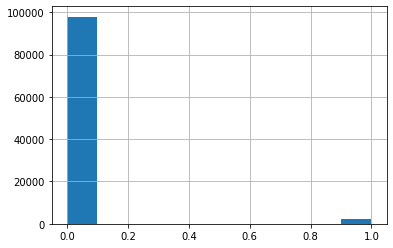

In [54]:
target = 'clicked'
print(df[target].sum() / len(df))
df[target].hist()

In [55]:
def get_types(df):
    dtypes = defaultdict(list)
    for col, dtype in df.dtypes.items():
        dtypes[str(dtype)].append(col)
    return dtypes

dtypes = get_types(df)
dtypes

defaultdict(list,
            {'int64': ['email_id', 'hour', 'user_past_purchases', 'clicked'],
             'object': ['email_text',
              'email_version',
              'weekday',
              'user_country']})

In [56]:
for col in dtypes['object']:
    print(col, len(df[col].unique()))

email_text 2
email_version 2
weekday 7
user_country 4


In [57]:
for col in dtypes['object']:
    df[col] = df[col].astype('category')   

In [58]:
def positive_pct_per_level(df, column, target):
    """
    Return count and % of positive class at all levels of feature.
    :param df:
    :param column:
    :return:
    """
    g = df[[column, target]].groupby(column).agg(['sum', 'count']).reset_index()
    target_pct = f"{target}_pct"
    g[target_pct] = g[target]['sum'] / g[target]['count']
    g['frequency_pct'] = g[target]['count'] / len(df)
    return g.sort_values(by=target_pct, ascending=False)

   hour clicked       clicked_pct frequency_pct
            sum count                          
22   23       6   145    0.041379      0.001451
23   24       2    69    0.028986      0.000690
9    10     226  8175    0.027645      0.081791
10   11     197  7477    0.026347      0.074807
11   12     165  6506    0.025361      0.065093
8     9     215  8524    0.025223      0.085283
14   15      85  3491    0.024348      0.034927
15   16      61  2756    0.022134      0.027574
13   14      90  4575    0.019672      0.045773
12   13     109  5579    0.019538      0.055818
2     3      89  4609    0.019310      0.046113
7     8     158  8397    0.018816      0.084012
16   17      35  1893    0.018489      0.018939
6     7     146  8200    0.017805      0.082041
4     5     115  6548    0.017563      0.065513
0     1      47  2701    0.017401      0.027024
5     6     124  7461    0.016620      0.074647
18   19      15   905    0.016575      0.009055
17   18      23  1421    0.016186      0

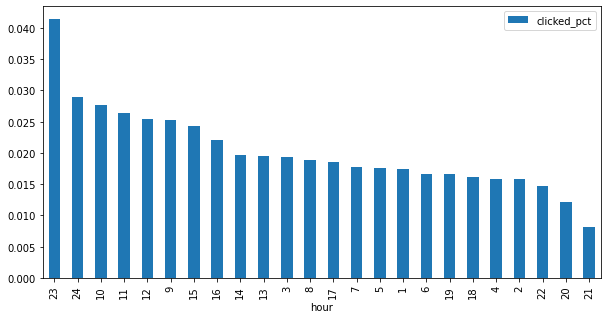

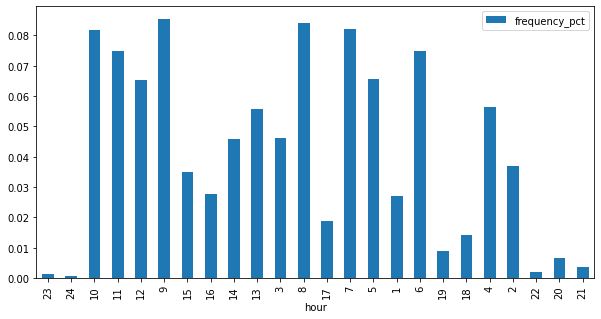

In [59]:
col = 'hour'
stats = positive_pct_per_level(df, col, target)
print(stats)
stats.plot(x=col, y=f'{target}_pct', kind='bar', figsize=(10, 5))
stats.plot(x=col, y='frequency_pct', kind='bar', figsize=(10, 5))

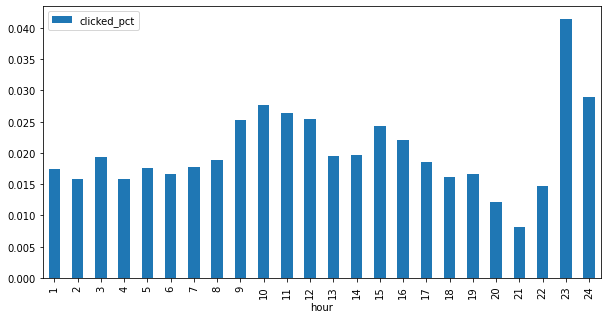

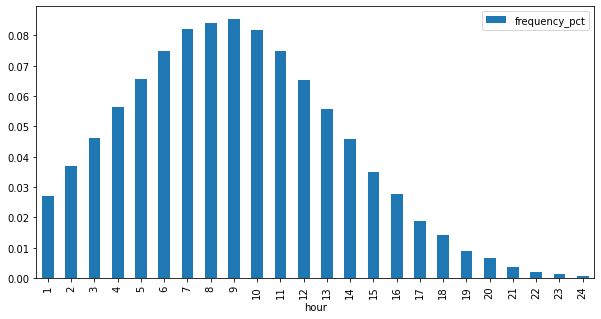

In [60]:
stats = stats.sort_values(by='hour')
stats.plot(x=col, y=f'{target}_pct', kind='bar', figsize=(10, 5))
stats.plot(x=col, y='frequency_pct', kind='bar', figsize=(10, 5))

    email_text clicked        clicked_pct frequency_pct
                   sum  count                          
1  short_email    1165  49702    0.023440      0.497269
0   long_email     904  50248    0.017991      0.502731


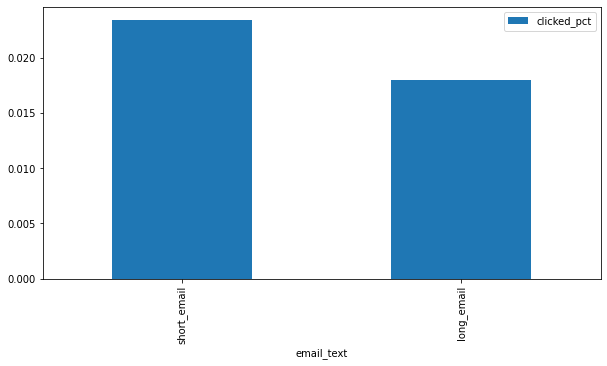

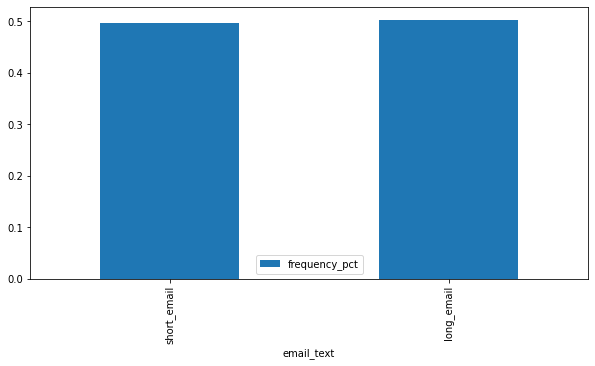

In [61]:
col = 'email_text'
stats = positive_pct_per_level(df, col, target)
print(stats)
stats.plot(x=col, y=f'{target}_pct', kind='bar', figsize=(10, 5))
stats.plot(x=col, y='frequency_pct', kind='bar', figsize=(10, 5))

  email_version clicked        clicked_pct frequency_pct
                    sum  count                          
1  personalized    1340  49772    0.026923      0.497969
0       generic     729  50178    0.014528      0.502031


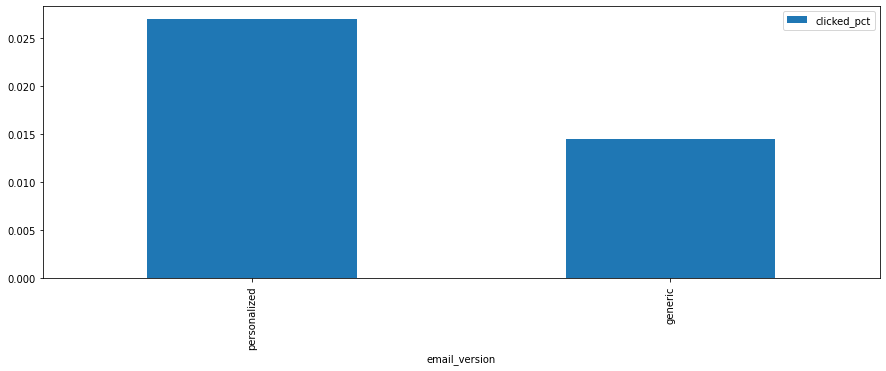

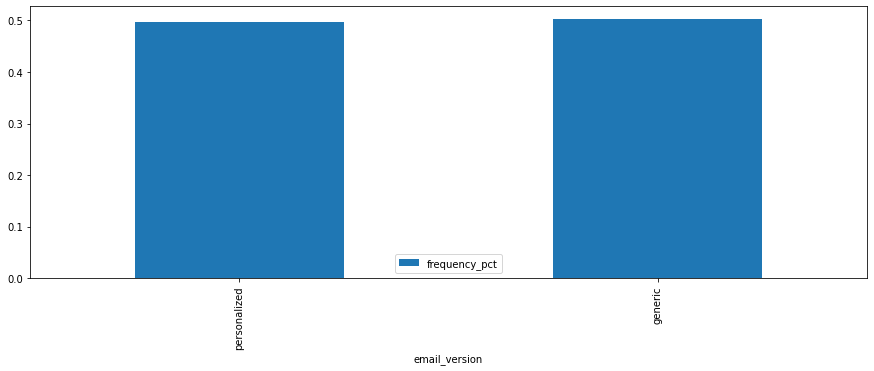

In [62]:
col = 'email_version'
stats = positive_pct_per_level(df, col, target)
print(stats)
stats.plot(x=col, y=f'{target}_pct', kind='bar', figsize=(15, 5))
stats.plot(x=col, y='frequency_pct', kind='bar', figsize=(15, 5))

     weekday clicked        clicked_pct frequency_pct
                 sum  count                          
6  Wednesday     383  14078    0.027206      0.140850
5    Tuesday     346  14137    0.024475      0.141441
4   Thursday     346  14274    0.024240      0.142811
1     Monday     324  14358    0.022566      0.143652
2   Saturday     255  14564    0.017509      0.145713
3     Sunday     228  14374    0.015862      0.143812
0     Friday     187  14165    0.013202      0.141721


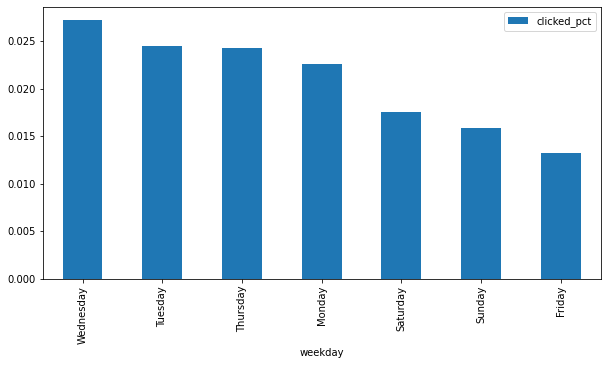

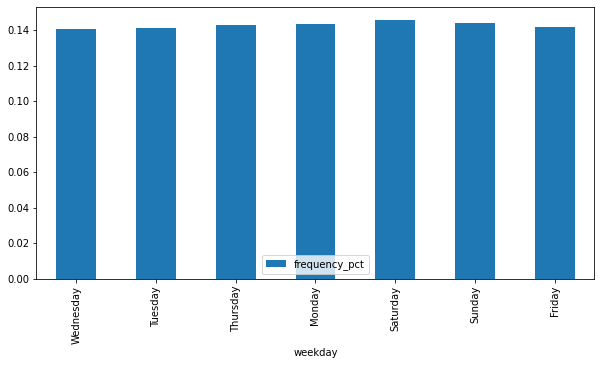

In [63]:
col = 'weekday'
stats = positive_pct_per_level(df, col, target)
print(stats)
stats.plot(x=col, y=f'{target}_pct', kind='bar', figsize=(10, 5))
stats.plot(x=col, y='frequency_pct', kind='bar', figsize=(10, 5))

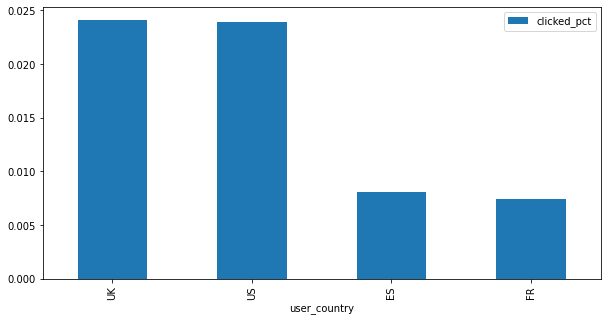

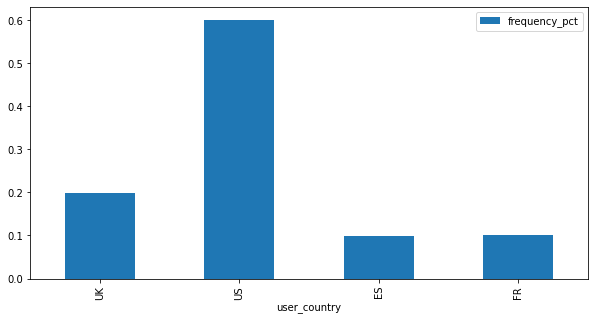

In [64]:
col = 'user_country'
stats = positive_pct_per_level(df, col, target)
stats.plot(x=col, y=f'{target}_pct', kind='bar', figsize=(10, 5))
stats.plot(x=col, y='frequency_pct', kind='bar', figsize=(10, 5))

[]

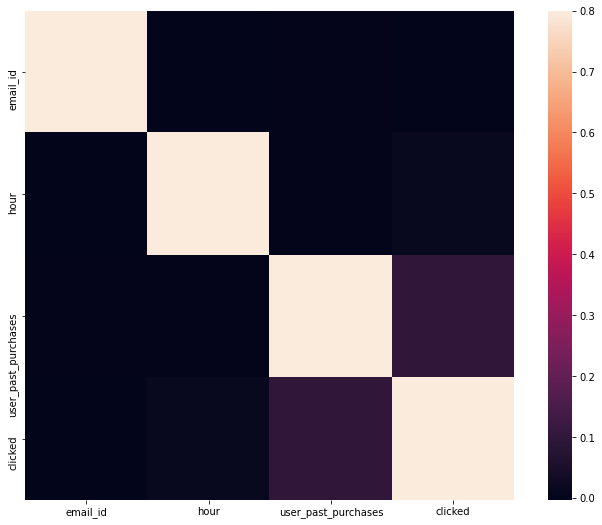

In [65]:
def correlation_heatmap(df, target=None, n_largest=None):
    f, ax = plt.subplots(figsize=(12, 9))
    # evidence for using both Kendall's Tau and Spearman's rho if the feature distributions are not
    # assumed to be normal: https://stats.stackexchange.com/questions/3943/kendall-tau-or-spearmans-rho
    # Some commenters say that Spearman's rho is more intepretable because it extends the idea of R^
    # in that it quantifies the difference between the % of concordant and discordant pairs among all
    # possible pairwise events.
    corrmat = df.corr(method='spearman')
    if n_largest is not None:
        cols = corrmat.nlargest(n_largest, target)  [target].index
        cm = np.corrcoef(df[cols].values.T)
        sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                    xticklabels=cols.values)
    else:
        cols = []
        sns.heatmap(corrmat, vmax=.8, square=True)

    return cols

correlation_heatmap(df[dtypes['int64']], target)

In [66]:
len(df)

99950

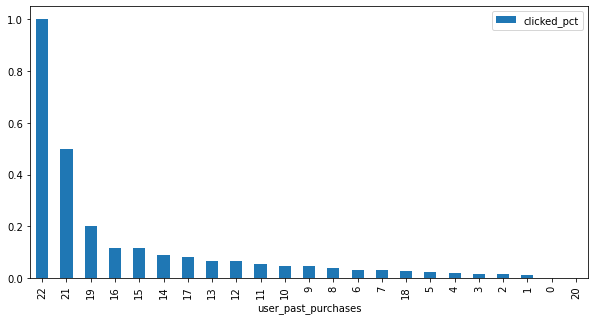

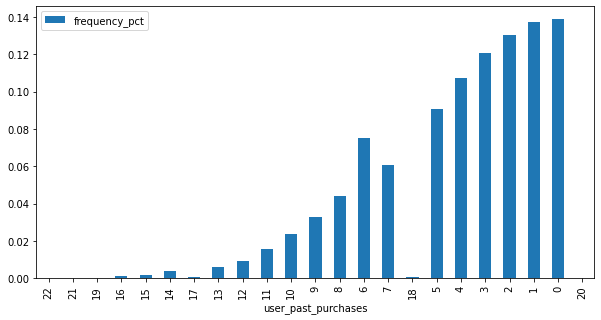

In [67]:
col = 'user_past_purchases'
stats = positive_pct_per_level(df, col, target)
stats.plot(x=col, y=f'{target}_pct', kind='bar', figsize=(10, 5))
stats.plot(x=col, y='frequency_pct', kind='bar', figsize=(10, 5))

# Baseline

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="lightgrey" if cm[i, j] > thresh else "darkgrey")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.91913334 0.08086666]
 [0.76770538 0.23229462]]


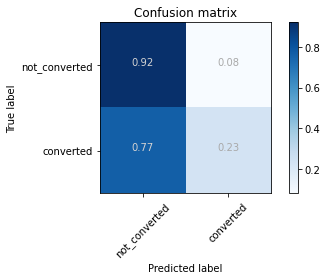

In [85]:
data = df.copy()
data['hour_binned']= pd.cut(data['hour'], bins=[1,5, 13, 21, 24], include_lowest=True, labels=['night', 'morning', 'afternoon', 'night2'])
#replace night2 with night
data['hour_binned']=data['hour_binned'].replace('night2', 'night').cat.remove_unused_categories()
  
#Bin purchases
data['purchase_binned']=pd.cut(data['user_past_purchases'], bins=[0,1, 4, 8, 23], include_lowest=True, right=False, labels=['None', 'Low', 'Medium', 'High'])
  
#prepare the data for the model
data_dummy = pd.get_dummies(data, drop_first=True).drop(['email_id', 'hour', 'user_past_purchases'], axis=1)
  
#split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)
  
#build the model. We choose a RF, but this personalization approach works with any kinds of models
rf = RandomForestClassifier(class_weight={0:0.05,1:0.95}, n_estimators=50, oob_score=True)
rf.fit(train.drop('clicked', axis=1), train['clicked'])
  
#let's print OOB confusion matrix
cm = confusion_matrix(test['clicked'], rf.predict(test.drop(target, axis=1)))
plot_confusion_matrix(cm, classes=['not_converted', 'converted'], normalize=True)

In [70]:
pd.get_dummies(df.copy(), drop_first=True)

,email_id,hour,user_past_purchases,clicked,email_text_short_email,email_version_personalized,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
0,8,9,3,0,1,0,0,0,0,1,0,0,0,0,1
1,33,6,0,0,0,1,1,0,0,0,0,0,0,0,1
2,46,14,3,0,1,0,0,0,0,0,1,0,0,0,1
3,49,11,10,0,0,1,0,0,0,1,0,0,0,0,1
4,65,8,3,0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99945,999969,21,0,0,1,0,0,0,0,1,0,0,0,0,1
99946,999972,6,5,0,0,1,0,0,0,0,1,0,0,0,1
99947,999976,5,0,0,0,1,0,0,0,0,0,1,0,1,0
99948,999980,10,4,0,0,0,0,0,0,1,0,0,1,0,0


In [71]:
def get_dummies_drop_level_and_join(df, column, level_to_drop):
    dummies = pd.get_dummies(df[column]).drop([level_to_drop], axis=1)
    return df.join(dummies).drop(column, axis=1)

Normalized confusion matrix
[[0.95216281 0.04783719]
 [0.91642012 0.08357988]]


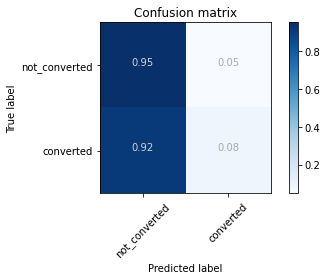

In [84]:
# Don't bin purchases
data = pd.get_dummies(df.copy(), drop_first=True)

data = data.drop('email_id', axis=1)
  
#split into train and test to avoid overfitting
train, test = train_test_split(data, test_size = 0.34)
  
#build the model. We choose a RF, but this personalization approach works with any kinds of models
rf = RandomForestClassifier(class_weight={0:0.05,1:0.95}, n_estimators=50, oob_score=True)
rf.fit(train.drop('clicked', axis=1), train['clicked'])
  
#let's print OOB confusion matrix
cm = confusion_matrix(train['clicked'], rf.oob_decision_function_[:,1].round(), labels=[0, 1])
plot_confusion_matrix(cm, classes=['not_converted', 'converted'], normalize=True)

Normalized confusion matrix
[[0.94924214 0.05075786]
 [0.90103218 0.09896782]]


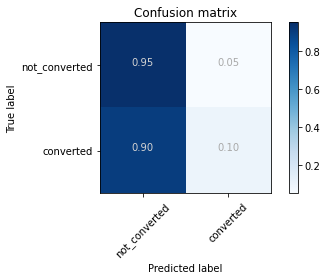

In [80]:
# Bin purchases
data = df.copy()
  
#prepare the data for the model
data = get_dummies_drop_level_and_join(data, 'email_text', 'long_email')
data = get_dummies_drop_level_and_join(data, 'email_version', 'generic')
data = get_dummies_drop_level_and_join(data, 'user_country', 'US')
data = get_dummies_drop_level_and_join(data, 'weekday', 'Saturday')
data = data.drop('email_id', axis=1)
  
#split into train and test to avoid overfitting
train, test = train_test_split(data, test_size = 0.2)
  
#build the model. We choose a RF, but this personalization approach works with any kinds of models
rf = RandomForestClassifier(class_weight={0:0.05,1:0.95}, n_estimators=50, oob_score=True)
rf.fit(train.drop('clicked', axis=1), train['clicked'])
  
#let's print OOB confusion matrix
cm = confusion_matrix(train['clicked'], rf.oob_decision_function_[:,1].round(), labels=[0, 1])
plot_confusion_matrix(cm, classes=['not_converted', 'converted'], normalize=True)

Normalized confusion matrix
[[0.95217147 0.04782853]
 [0.89342404 0.10657596]]


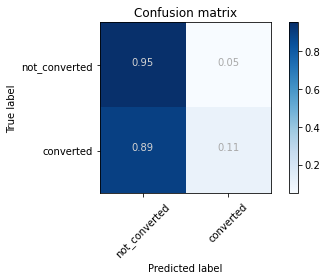

In [78]:
cm = confusion_matrix(test['clicked'], rf.predict(test.drop(target, axis=1)), labels=[0, 1])
plot_confusion_matrix(cm, classes=['not_converted', 'converted'], normalize=True)

# Modeling

In [ ]:
dtypes

In [ ]:
df['email_version'].unique()

In [ ]:
pd.get_dummies(df['email_version'], drop_first=True)

In [ ]:
get_dummies_drop_level_and_join(df, 'email_version', 'generic')

In [ ]:
def get_dummies_drop_level_and_join(df, column, level_to_drop):
    dummies = pd.get_dummies(df[column]).drop([level_to_drop], axis=1)
    return df.join(dummies).drop(column, axis=1)

df = get_dummies_drop_level_and_join(df, 'email_text', 'long_email')
df = get_dummies_drop_level_and_join(df, 'email_version', 'generic')
df = get_dummies_drop_level_and_join(df, 'user_country', 'US')
df = get_dummies_drop_level_and_join(df, 'weekday', 'Saturday')

In [ ]:
df.columns

In [ ]:
import statsmodels.api as sm

x = df.drop(target, axis=1)
x['intercept'] = 1
print(x.columns)
y = df[target]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=random_state, test_size=.2, stratify=y)
logit = sm.Logit(ytrain, xtrain)
output = logit.fit()

In [ ]:
preds = output.predict(xtest)

In [ ]:
pd.DataFrame(preds).hist(bins=100, figsize=(15, 4))

In [ ]:
def plot_precision_recall_threshold(y_actual, y_pred_probas):
    precision, recall, thresholds = precision_recall_curve(y_actual, y_pred_probas)
    precision = precision[:-1]
    recall = recall[:-1]
    df = pd.concat([
        pd.DataFrame({'stat_name': ['precision' for _ in range(len(precision))],
                      'stat_value': precision,
                      'threshold': thresholds}),
        pd.DataFrame({'stat_name': ['recall' for _ in range(len(precision))],
                      'stat_value': recall,
                      'threshold': thresholds})
    ])

    ax = sns.lineplot(y=df['stat_value'], x=df['threshold'], hue=df['stat_name'],
                      palette={'precision': 'red', 'recall': 'blue'})
    ax.set_title('Precision/Recall per Threshold')
    return ax

pred_probas = output.predict(xtest)
plot_precision_recall_threshold(ytest, pred_probas)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight={0: .02, 1: .98}).fit(xtrain, ytrain)

In [ ]:
pred_probas = clf.predict_proba(xtest)
pred_probas = pred_probas[:, 1]
pd.DataFrame(pred_probas).hist()

In [ ]:
plot_precision_recall_threshold(ytest, pred_probas)

In [ ]:
def get_precision_recall_df(y_actual, y_pred_probas):
    precision, recall, thresholds = precision_recall_curve(y_actual, y_pred_probas)
    df = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'threshold': thresholds}).sort_values(
        by='threshold')
    return df

get_precision_recall_df(ytest, pred_probas)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="lightgrey" if cm[i, j] > thresh else "darkgrey")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

plot_confusion_matrix(confusion_matrix(ytest, [0 if pred < .01 else 0 for pred in pred_probas]), 
                                       classes=['not_converted', 'converted'])

In [ ]:
def statsmodels_output_table(output):
    output_table = pd.DataFrame(dict(coefficients=output.params,
                             SE=output.bse, z=output.tvalues,
                             p_values=output.pvalues))
    significant = output_table.loc[output_table['p_values'] >= 0.05].sort_values("coefficients", ascending=False)
    not_significant = output_table.loc[output_table['p_values'] < 0.05].sort_values("coefficients", ascending=False)
    return significant, not_significant


In [ ]:
sig, not_sig = statsmodels_output_table(output)
sig

In [ ]:
not_sig

In [ ]:
rf = RandomForestClassifier(class_weight={0:0.02,1:0.98}, n_estimators=50)

# results = cross_validate()
rf.fit(xtrain, ytrain)
pred_probas = rf.predict_proba(xtest)
# pred_probas = pred_probas[:, 1]

In [ ]:
pd.DataFrame(pred_probas).hist()

In [ ]:
pd.DataFrame(ytest).hist()

In [ ]:
plot_precision_recall_threshold(ytest, pred_probas)

In [ ]:
get_precision_recall_df(ytest, pred_probas)

In [ ]:
rf = RandomForestClassifier(class_weight={0:0.05,1:0.95}, n_estimators=50, oob_score=True)
rf.fit(xtrain, ytrain)
  
#let's print OOB confusion matrix
print(pd.DataFrame(confusion_matrix(xtrain, rf.oob_decision_function_[:,1].round(), labels=[0, 1])))

In [ ]:
rf.oob_decision_function_[:, 1]

In [ ]:
plot_confusion_matrix(confusion_matrix(ytest, [0 if pred < .01 else 1 for pred in pred_probas]), 
                                       classes=['not_converted', 'converted'])